<a href="https://colab.research.google.com/github/NaufalSyahandra/PCVK_GANJIL_2024/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practicum 9 - Morphology**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Import Library**

---



In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


## **Defining the Dilation Function**

---


This function performs the dilation operation. It takes an image and a structuring element as input and returns the dilated image. Dilation is used to add pixels to the boundaries of objects in an image.

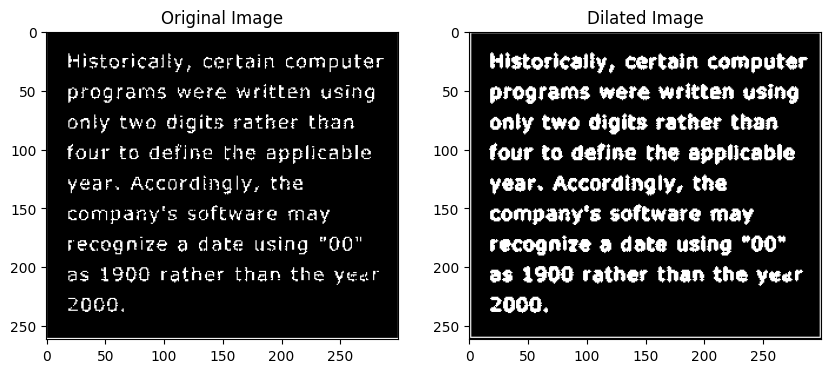

In [4]:
def dilate(img, struct_element):
    # Size of the Structuring Element (SE)
    h, w = struct_element.shape
    # Get the offsets for the SE
    offset_x = w // 2
    offset_y = h // 2
    # Create an empty image to store the dilation result
    dilated_img = np.zeros_like(img)

    # Loop through each pixel in the image
    for y in range(offset_y, img.shape[0] - offset_y):
        for x in range(offset_x, img.shape[1] - offset_x):
            # Get the Region of Interest (ROI)
            roi = img[y-offset_y:y+offset_y+1, x-offset_x:x+offset_x+1]
            # Apply dilation: If any SE element matches an object pixel, set the center pixel to 255
            if np.any(roi[struct_element == 1] == 255):
                dilated_img[y, x] = 255
    return dilated_img

img = cv2.imread('/content/drive/MyDrive/PCVK/morphology.png', 0)

# Binarizing the Image
_, binary_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Creating the Structuring Element
struct_element = np.array([[0, 1, 0],
                           [1, 1, 1],
                           [0, 1, 0]], dtype=np.uint8)

# Applying the Dilation Function
dilated_img = dilate(binary_img, struct_element)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(binary_img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(dilated_img, cmap='gray')
plt.title('Dilated Image')
plt.show()

## **Creating the Structuring Element**

---


create a 3x3 cross-shaped structuring element using OpenCV's `getStructuringElement` function. This structuring element will be used for the dilation operation.

Structuring Element (Cross 3x3):
 [[0 1 0]
 [1 1 1]
 [0 1 0]]


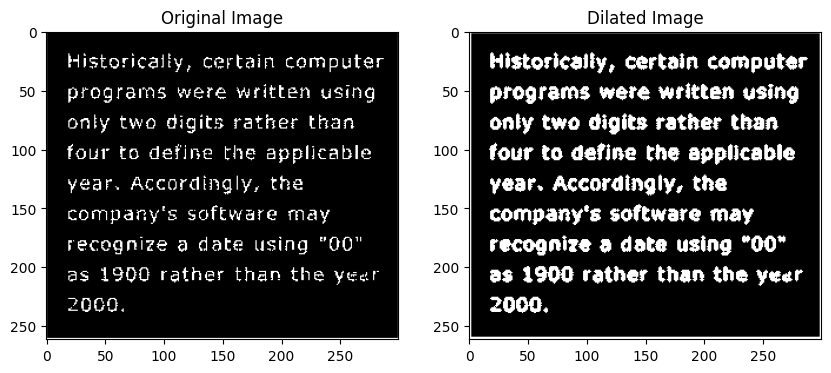

In [5]:
img = cv2.imread('/content/drive/MyDrive/PCVK/morphology.png', 0)

# Converting the Image to Binary
_, binary_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

struct_element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

print("Structuring Element (Cross 3x3):\n", struct_element)

# Applying Dilation
dilated_img = cv2.morphologyEx(binary_img, cv2.MORPH_DILATE, struct_element)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(binary_img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(dilated_img, cmap='gray')
plt.title('Dilated Image')
plt.show()


## **Defining the Erosion Function**

---


This function performs the erosion operation. It takes an image and a structuring element as input and returns the eroded image. Erosion reduces the size of objects in a binary image.

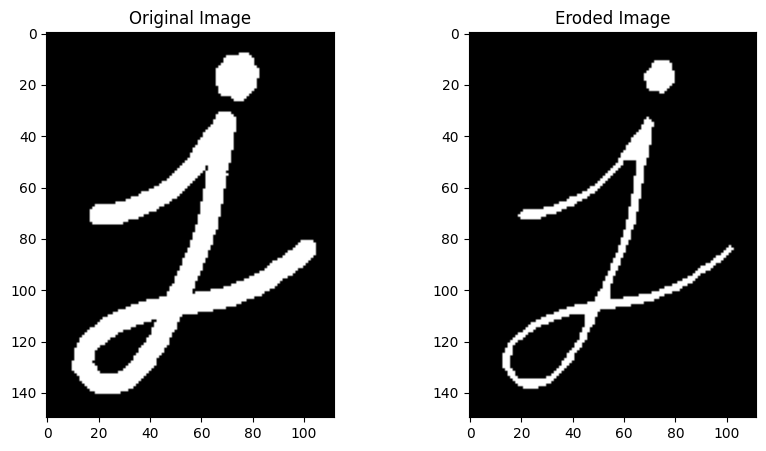

In [6]:
def erosi(img, struct_element):
    # Size of the Structuring Element (SE)
    h, w = struct_element.shape
    # Get the offsets for the SE
    offset_x = w // 2
    offset_y = h // 2
    # Create an empty image to store the erosion result
    eroded_img = np.zeros_like(img)

    # Loop through each pixel in the image
    for y in range(offset_y, img.shape[0] - offset_y):
        for x in range(offset_x, img.shape[1] - offset_x):
            # Get the Region of Interest (ROI)
            roi = img[y-offset_y:y+offset_y+1, x-offset_x:x+offset_x+1]
            # Apply erosion: If all SE elements match the white pixels (255), set the center pixel to 255
            if np.all(roi[struct_element == 1] == 255):
                eroded_img[y, x] = 255
    return eroded_img

img = cv2.imread('/content/drive/MyDrive/PCVK/j.png', 0)

# Converting the Image to Binary
_, binary_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Creating the Structuring Element
struct_element = np.ones((5, 5), dtype=np.uint8)

# Applying the Erosion Function
eroded_img = erosi(binary_img, struct_element)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(binary_img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(eroded_img, cmap='gray')
plt.title('Eroded Image')
plt.show()

## **Creating the Structuring Element**

---


create a 5x5 square-shaped structuring element using OpenCV's `getStructuringElement` function. This structuring element will be used for the erosion operation.

Structuring Element (Square 5x5):
 [[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


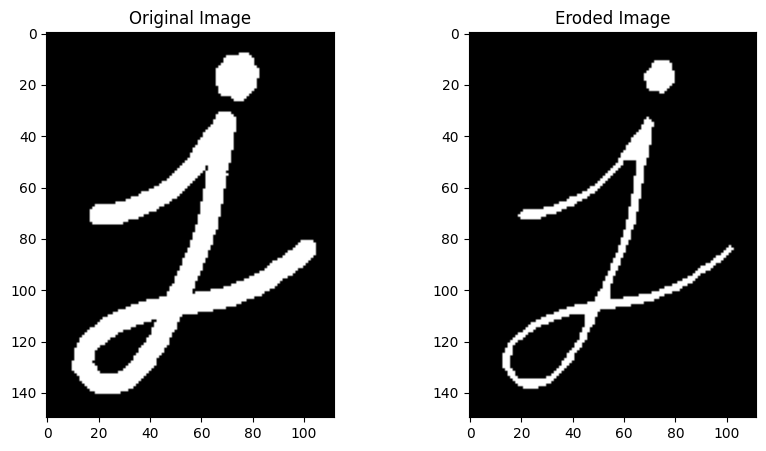

In [7]:
img = cv2.imread('/content/drive/MyDrive/PCVK/j.png', 0)

# Converting the Image to Binary
_, binary_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

struct_element = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
print("Structuring Element (Square 5x5):\n", struct_element)

# Applying Erosion
eroded_img = cv2.erode(binary_img, struct_element)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(binary_img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(eroded_img, cmap='gray')
plt.title('Eroded Image')
plt.show()

## **Combining Erosion and Dilation for Opening Operation**

---

The function performs the opening operation, which is achieved by combining erosion and dilation to effectively remove small objects from the foreground while preserving the shape and size of larger objects

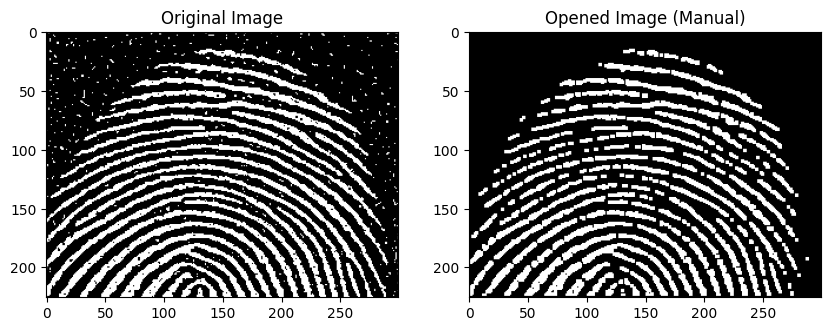

In [8]:
def erosi(img, struct_element):
    h, w = struct_element.shape
    offset_x = w // 2
    offset_y = h // 2
    eroded_img = np.zeros_like(img)

    for y in range(offset_y, img.shape[0] - offset_y):
        for x in range(offset_x, img.shape[1] - offset_x):
            roi = img[y-offset_y:y+offset_y+1, x-offset_x:x+offset_x+1]
            if np.all(roi[struct_element == 1] == 255):
                eroded_img[y, x] = 255
    return eroded_img

def dilasi(img, struct_element):
    h, w = struct_element.shape
    offset_x = w // 2
    offset_y = h // 2
    dilated_img = np.zeros_like(img)

    for y in range(offset_y, img.shape[0] - offset_y):
        for x in range(offset_x, img.shape[1] - offset_x):
            roi = img[y-offset_y:y+offset_y+1, x-offset_x:x+offset_x+1]
            if np.any(roi[struct_element == 1] == 255):
                dilated_img[y, x] = 255
    return dilated_img

def opening(img, struct_element):
    eroded = erosi(img, struct_element)
    opened_img = dilasi(eroded, struct_element)
    return opened_img

img = cv2.imread('/content/drive/MyDrive/PCVK/fingerprint.png', 0)

_, binary_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

struct_element = np.ones((3, 3), dtype=np.uint8)

opened_img_manual = opening(binary_img, struct_element)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(binary_img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(opened_img_manual, cmap='gray')
plt.title('Opened Image (Manual)')
plt.show()

## **Applying Opening Operation using OpenCV**

---

reads a grayscale image and converts it to a binary format using thresholding, creates a square structuring element (3x3), and then applies the opening operation using OpenCV to remove small objects from the foreground while preserving the larger structures

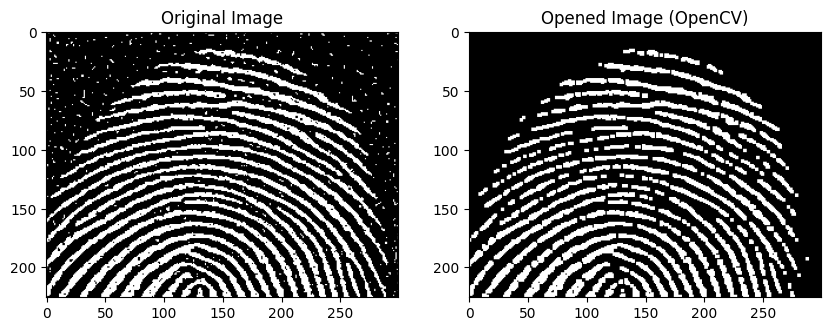

In [9]:
img = cv2.imread('/content/drive/MyDrive/PCVK/fingerprint.png', 0)

# Thresholding to convert the image to binary (0 or 255)
_, binary_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Creating a Structuring Element (Square 3x3)
struct_element = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Applying the opening operation using OpenCV
opened_img_cv = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, struct_element)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(binary_img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(opened_img_cv, cmap='gray')
plt.title('Opened Image (OpenCV)')
plt.show()


## **Applying Closing Operation using Custom Functions**

---

defines custom functions for dilation and erosion, combines them to perform the closing operation, reads a grayscale image, converts it to binary format using thresholding, and then applies the closing operation to fill small holes in the foreground while maintaining the overall shape

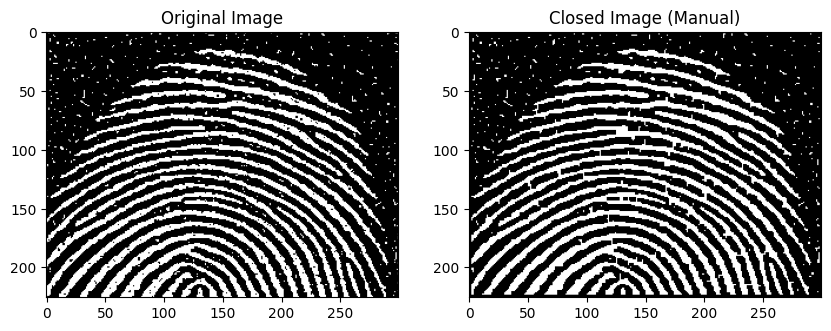

In [10]:
# Function for dilation
def dilasi(img, struct_element):
    h, w = struct_element.shape
    offset_x = w // 2
    offset_y = h // 2
    dilated_img = np.zeros_like(img)

    for y in range(offset_y, img.shape[0] - offset_y):
        for x in range(offset_x, img.shape[1] - offset_x):
            roi = img[y-offset_y:y+offset_y+1, x-offset_x:x+offset_x+1]
            if np.any(roi[struct_element == 1] == 255):
                dilated_img[y, x] = 255
    return dilated_img

# Function for erosion
def erosi(img, struct_element):
    h, w = struct_element.shape
    offset_x = w // 2
    offset_y = h // 2
    eroded_img = np.zeros_like(img)

    for y in range(offset_y, img.shape[0] - offset_y):
        for x in range(offset_x, img.shape[1] - offset_x):
            roi = img[y-offset_y:y+offset_y+1, x-offset_x:x+offset_x+1]
            if np.all(roi[struct_element == 1] == 255):
                eroded_img[y, x] = 255
    return eroded_img

# Function for closing
def closing(img, struct_element):
    dilated = dilasi(img, struct_element)
    closed_img = erosi(dilated, struct_element)
    return closed_img

img = cv2.imread('/content/drive/MyDrive/PCVK/fingerprint.png', 0)

# Thresholding to convert the image to binary (0 or 255)
_, binary_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Structuring Element (Square 3x3)
struct_element = np.ones((3, 3), dtype=np.uint8)

# Applying the closing function
closed_img_manual = closing(binary_img, struct_element)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(binary_img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(closed_img_manual, cmap='gray')
plt.title('Closed Image (Manual)')
plt.show()

## **Applying Closing Operation using OpenCV**

---

reads a grayscale image, converts it to binary format using thresholding, creates a structuring element, and applies the closing operation using OpenCV to fill small holes in the foreground, while maintaining the overall shape of the objects

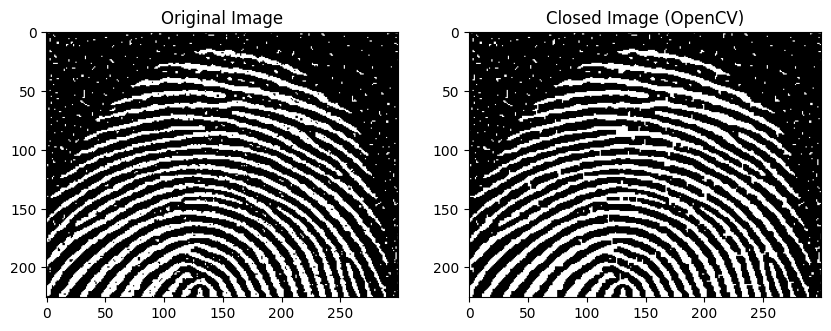

In [11]:
img = cv2.imread('/content/drive/MyDrive/PCVK/fingerprint.png', 0)

# Thresholding to convert the image to binary (0 or 255)
_, binary_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Creating Structuring Element (Square 3x3)
struct_element = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Applying closing operation using OpenCV
closed_img_cv = cv2.morphologyEx(binary_img, cv2.MORPH_CLOSE, struct_element)

# Displaying the original image and the result of the closing operation (using OpenCV)
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(binary_img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(closed_img_cv, cmap='gray')
plt.title('Closed Image (OpenCV)')
plt.show()


## **Dilation Operation with Cross Structuring Elements**

---

creates Cross-shaped structuring elements of sizes 3x3 and 5x5, applies dilation to a binary image using both structuring elements, and displays the original and dilated images for comparison

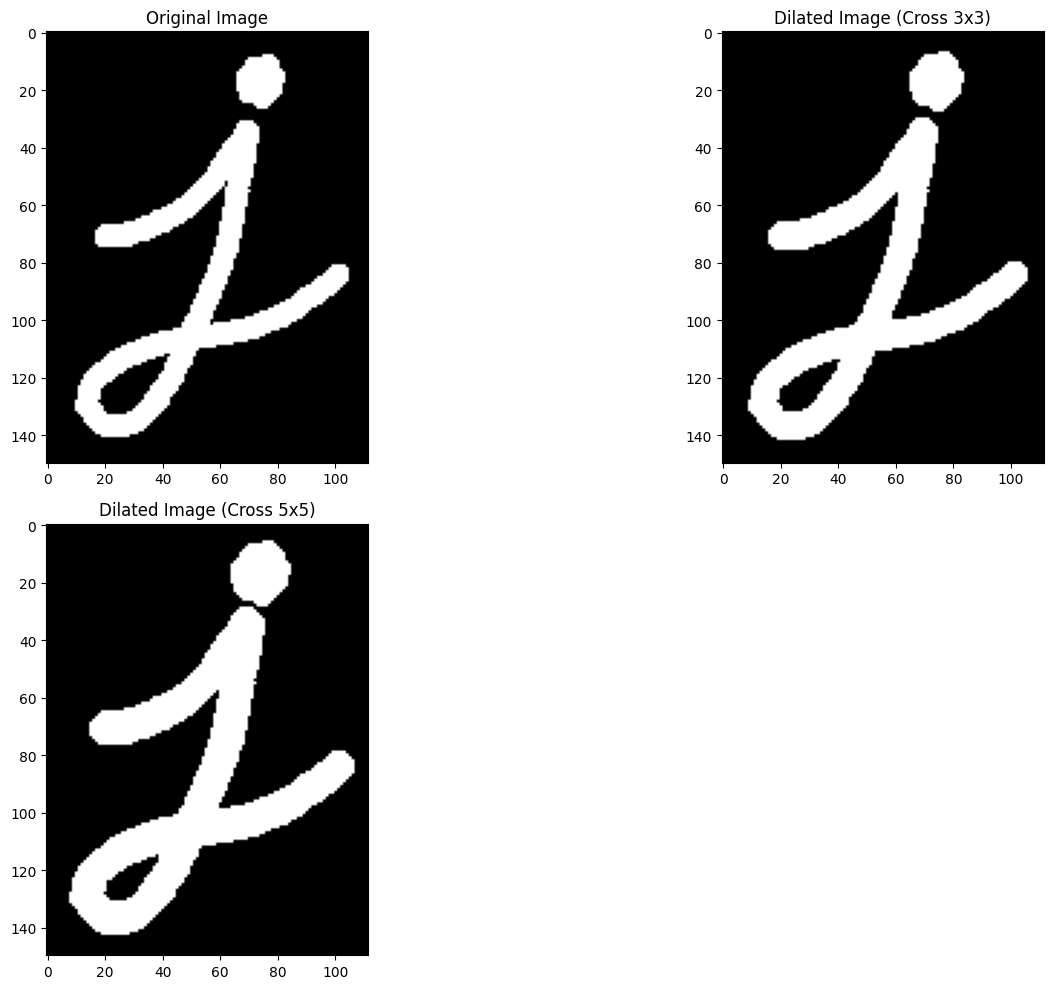

In [12]:
# Function to create a Cross-shaped Structuring Element
def create_cross_se(size):
    se = np.zeros((size, size), dtype=np.uint8)
    mid = size // 2
    se[mid, :] = 1  # Middle row
    se[:, mid] = 1  # Middle column
    return se

# Function for dilation
def dilasi(img, struct_element):
    h, w = struct_element.shape
    offset_x = w // 2
    offset_y = h // 2
    dilated_img = np.zeros_like(img)

    for y in range(offset_y, img.shape[0] - offset_y):
        for x in range(offset_x, img.shape[1] - offset_x):
            roi = img[y-offset_y:y+offset_y+1, x-offset_x:x+offset_x+1]
            if np.any(roi[struct_element == 1] == 255):
                dilated_img[y, x] = 255
    return dilated_img

img = cv2.imread('/content/drive/MyDrive/PCVK/j.png', 0)

# Thresholding to convert the image to binary (0 or 255)
_, binary_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Creating Cross Structuring Elements (3x3 and 5x5)
se_3x3 = create_cross_se(3)
se_5x5 = create_cross_se(5)

# Applying dilation for both structuring elements
dilated_img_3x3 = dilasi(binary_img, se_3x3)
dilated_img_5x5 = dilasi(binary_img, se_5x5)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(binary_img, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(dilated_img_3x3, cmap='gray')
plt.title('Dilated Image (Cross 3x3)')

plt.subplot(2, 2, 3)
plt.imshow(dilated_img_5x5, cmap='gray')
plt.title('Dilated Image (Cross 5x5)')

plt.tight_layout()
plt.show()


## **Dilation Operation with Circular Structuring Elements**

---

creates Circular structuring elements of sizes 3x3 and 5x5, applies dilation to a binary image using both structuring elements, and displays the original and dilated images for comparison

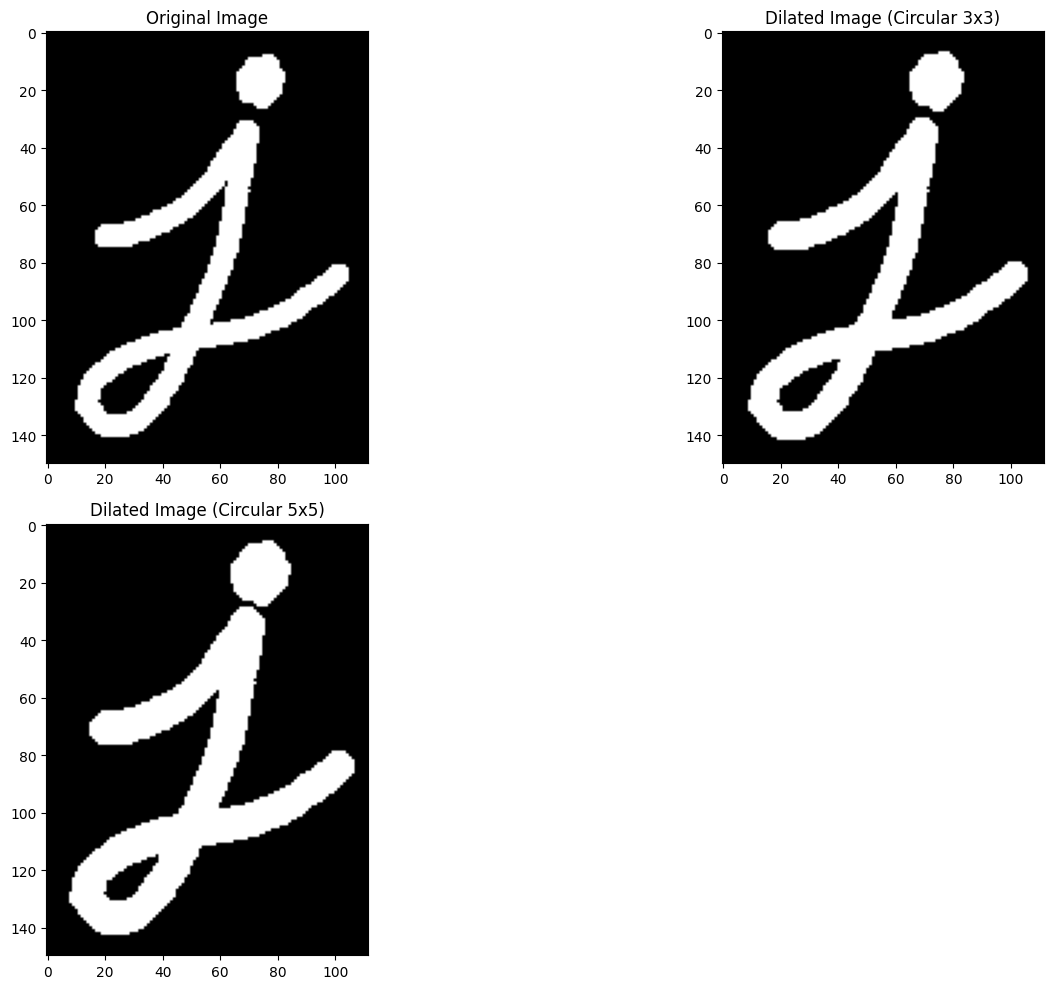

In [13]:
# Function to create a Circular-shaped Structuring Element
def create_circular_se(size):
    radius = size // 2
    y, x = np.ogrid[-radius:radius+1, -radius:radius+1]
    se = (x**2 + y**2 <= radius**2).astype(np.uint8)  # Circle
    return se

# Function for dilation
def dilasi(img, struct_element):
    h, w = struct_element.shape
    offset_x = w // 2
    offset_y = h // 2
    dilated_img = np.zeros_like(img)

    for y in range(offset_y, img.shape[0] - offset_y):
        for x in range(offset_x, img.shape[1] - offset_x):
            roi = img[y-offset_y:y+offset_y+1, x-offset_x:x+offset_x+1]
            if np.any(roi[struct_element == 1] == 255):
                dilated_img[y, x] = 255
    return dilated_img

img = cv2.imread('/content/drive/MyDrive/PCVK/j.png', 0)

# Thresholding to convert the image to binary (0 or 255)
_, binary_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Creating Circular Structuring Elements (3x3 and 5x5)
se_3x3 = create_circular_se(3)
se_5x5 = create_circular_se(5)

# Applying dilation for both structuring elements
dilated_img_3x3 = dilasi(binary_img, se_3x3)
dilated_img_5x5 = dilasi(binary_img, se_5x5)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(binary_img, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(dilated_img_3x3, cmap='gray')
plt.title('Dilated Image (Circular 3x3)')

plt.subplot(2, 2, 3)
plt.imshow(dilated_img_5x5, cmap='gray')
plt.title('Dilated Image (Circular 5x5)')

plt.tight_layout()
plt.show()

## **Erosion Operation with Rectangular Structuring Elements**

---

 creates rectangular structuring elements of sizes 3x5 and 5x7, applies erosion to a binary image using both structuring elements, and displays the original and eroded images for comparison

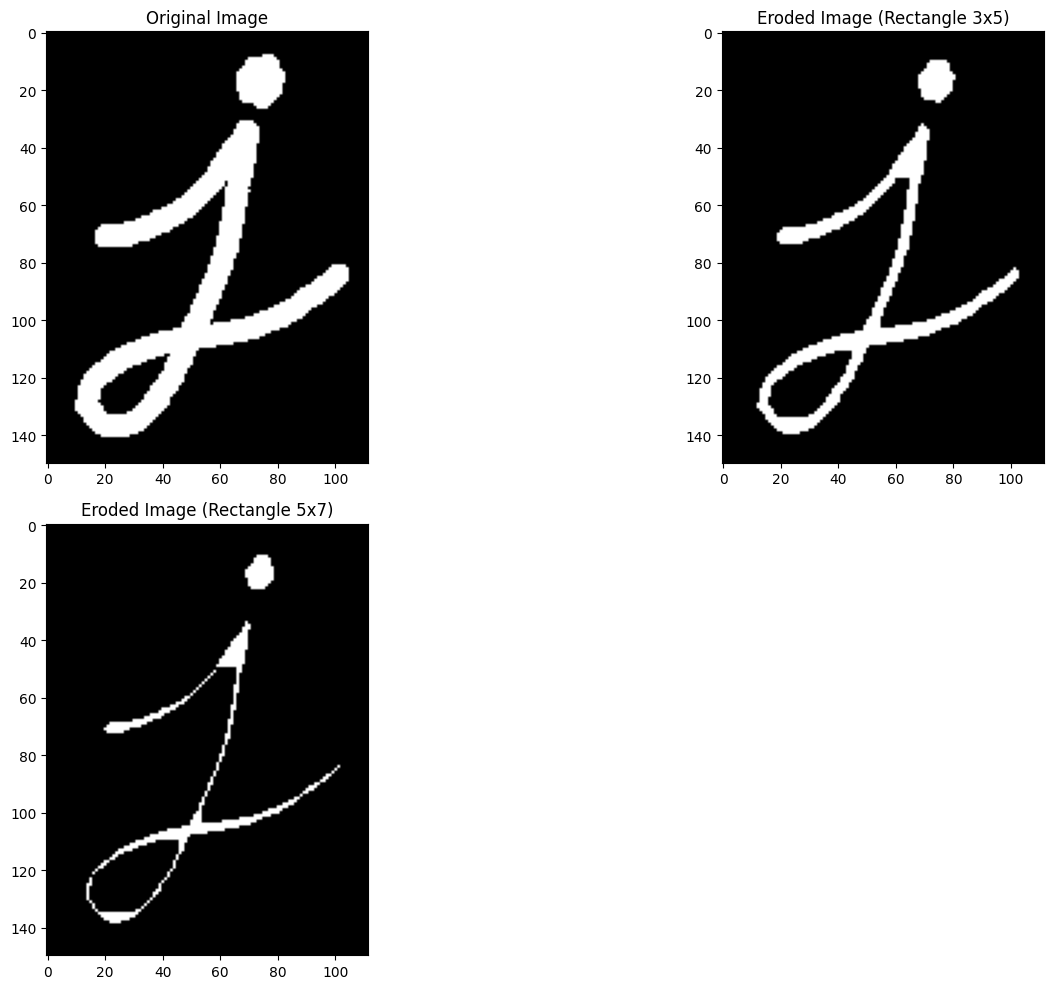

In [14]:
# Function to create a Rectangular-shaped Structuring Element
def create_rectangle_se(height, width):
    return np.ones((height, width), dtype=np.uint8)

# Function for erosion
def erosi(img, struct_element):
    h, w = struct_element.shape
    offset_x = w // 2
    offset_y = h // 2
    eroded_img = np.zeros_like(img)

    for y in range(offset_y, img.shape[0] - offset_y):
        for x in range(offset_x, img.shape[1] - offset_x):
            roi = img[y-offset_y:y+offset_y+1, x-offset_x:x+offset_x+1]
            if np.all(roi[struct_element == 1] == 255):
                eroded_img[y, x] = 255
    return eroded_img

img = cv2.imread('/content/drive/MyDrive/PCVK/j.png', 0)

# Thresholding to convert the image to binary (0 or 255)
_, binary_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Creating Rectangular Structuring Elements (3x5 and 5x7)
se_3x5 = create_rectangle_se(3, 5)
se_5x7 = create_rectangle_se(5, 7)

# Applying erosion for both structuring elements
eroded_img_3x5 = erosi(binary_img, se_3x5)
eroded_img_5x7 = erosi(binary_img, se_5x7)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(binary_img, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(eroded_img_3x5, cmap='gray')
plt.title('Eroded Image (Rectangle 3x5)')

plt.subplot(2, 2, 3)
plt.imshow(eroded_img_5x7, cmap='gray')
plt.title('Eroded Image (Rectangle 5x7)')

plt.tight_layout()
plt.show()

## **Erosion Operation with Vertical Line Structuring Elements**

---

creates vertical line structuring elements of sizes 3x1 and 5x1, applies erosion to a binary image using both structuring elements, and displays the original and eroded images for comparison

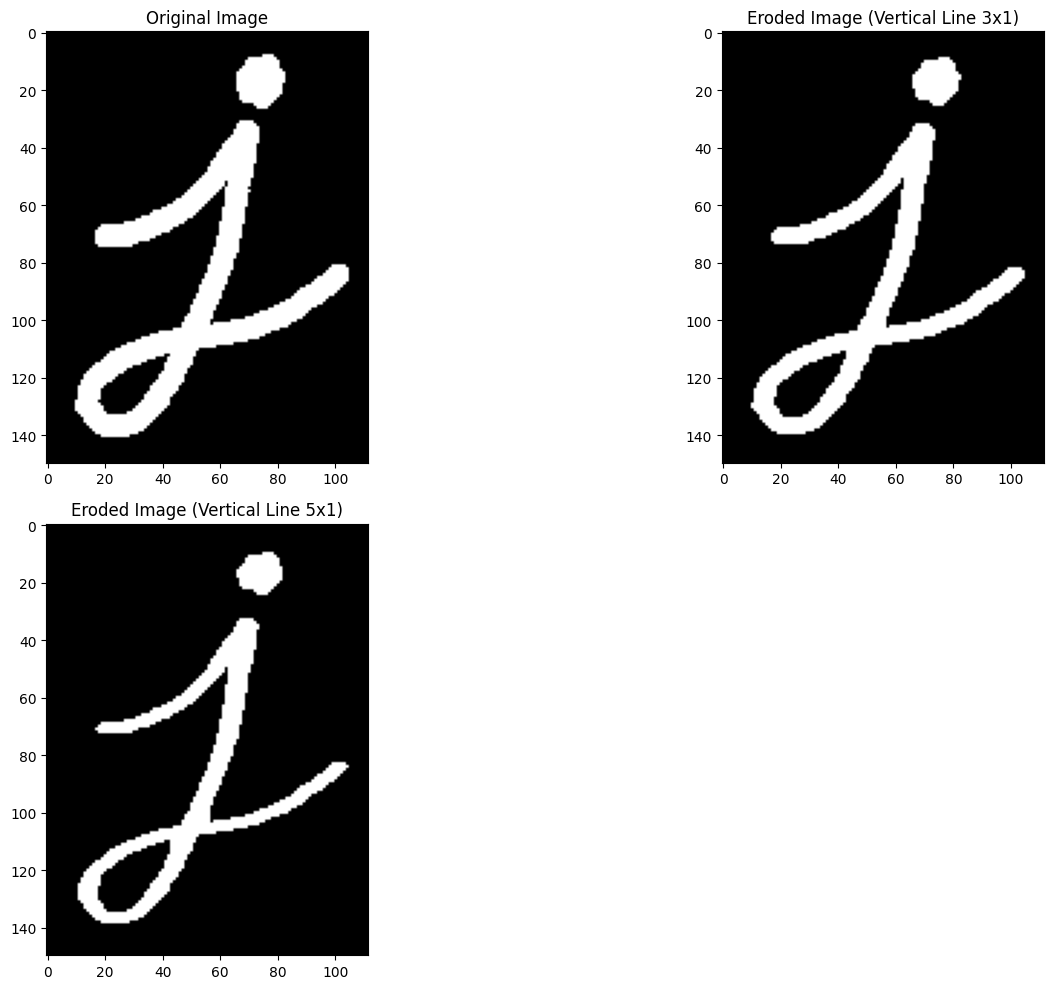

In [15]:
# Function to create a Vertical Line-shaped Structuring Element
def create_vertical_line_se(size):
    se = np.zeros((size, 1), dtype=np.uint8)
    se[:, 0] = 1  # Fill the first column with 1
    return se

# Function for erosion
def erosi(img, struct_element):
    h, w = struct_element.shape
    offset_x = w // 2
    offset_y = h // 2
    eroded_img = np.zeros_like(img)

    for y in range(offset_y, img.shape[0] - offset_y):
        for x in range(offset_x, img.shape[1] - offset_x):
            roi = img[y-offset_y:y+offset_y+1, x-offset_x:x+offset_x+1]
            if np.all(roi[struct_element == 1] == 255):
                eroded_img[y, x] = 255
    return eroded_img

img = cv2.imread('/content/drive/MyDrive/PCVK/j.png', 0)

# Thresholding to convert the image to binary (0 or 255)
_, binary_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Creating Vertical Line Structuring Elements (3x1 and 5x1)
se_3x1 = create_vertical_line_se(3)
se_5x1 = create_vertical_line_se(5)

# Applying erosion for both structuring elements
eroded_img_3x1 = erosi(binary_img, se_3x1)
eroded_img_5x1 = erosi(binary_img, se_5x1)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(binary_img, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(eroded_img_3x1, cmap='gray')
plt.title('Eroded Image (Vertical Line 3x1)')

plt.subplot(2, 2, 3)
plt.imshow(eroded_img_5x1, cmap='gray')
plt.title('Eroded Image (Vertical Line 5x1)')

plt.tight_layout()
plt.show()
